# Etude sur CNN avec TensorFlow sur les image CIFAR10

## Auteur : TAPSOBA Abdoul Kader

* Importation des packages

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical

* Charger et explorer les données

In [19]:

## Les données MNIST
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [20]:
# Dimensions des ensembles
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)

Dimensions de X_train : (50000, 32, 32, 3)
Dimensions de X_test : (10000, 32, 32, 3)


In [21]:
# Labelisation des images
class_name = ["avion", "automobile", "oiseau", "chat", "cerf", "chien", "grenouille", "cheval", "bateau", "camion"]

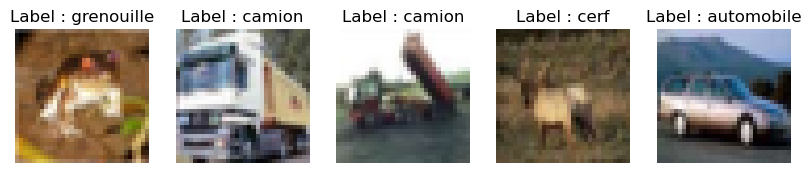

In [22]:
# Affichage de quelques images
plt.figure(figsize=(10,5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label : {class_name[y_train[i, 0]]}")
    plt.axis('off')
plt.show()

* Pretraitement des données

In [23]:
# Normaliser les pixels entre 0 et 1 en dvisant par 255
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [24]:
# Convertir les etiquettes en representation one-hot
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

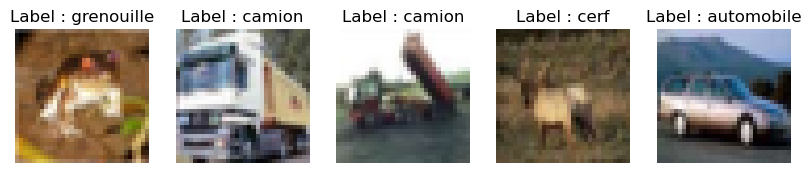

In [25]:
# Affichage de quelques images
plt.figure(figsize=(10,5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    yc = y_train[i].argmax(axis=-1)
    plt.title(f"Label : {class_name[yc]}")
    plt.axis('off')
plt.show()

In [26]:
# verification taille des images
X_train.shape[1:]

(32, 32, 3)

* Construction du modèle

In [27]:
# Modèle CNN
model = Sequential([
    Conv2D(64, (3, 3), strides=(1,1), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(64, (3, 3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\Mr TAPS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,578 (1.15 MB)

 Trainable params: 301,578 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

* Compilation du modele

In [28]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

* Entrainement du modele

In [56]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8177 - loss: 0.5181
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8283 - loss: 0.4873
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8391 - loss: 0.4530
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8550 - loss: 0.4168
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8615 - loss: 0.3859
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8749 - loss: 0.3634
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8784 - loss: 0.3366
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8910 - loss: 0.3132
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8936 - loss: 0.2975
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9065 - loss: 0.2700
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9111 - loss: 0.2519
Epoch 12

* Evaluation du modele

In [57]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss sur le test : {test_loss}")
print(f"Accuracy sur le test : {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6777 - loss: 2.2444
Loss sur le test : 2.253467082977295
Accuracy sur le test : 0.6801999807357788


* Visualisation des performances

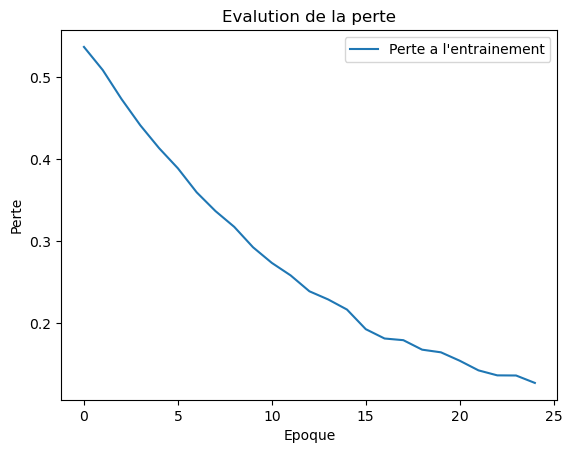

In [58]:
plt.plot(history.history['loss'], label='Perte a l\'entrainement')
plt.title("Evalution de la perte")
plt.xlabel("Epoque")
plt.ylabel("Perte")
plt.legend()
plt.show()

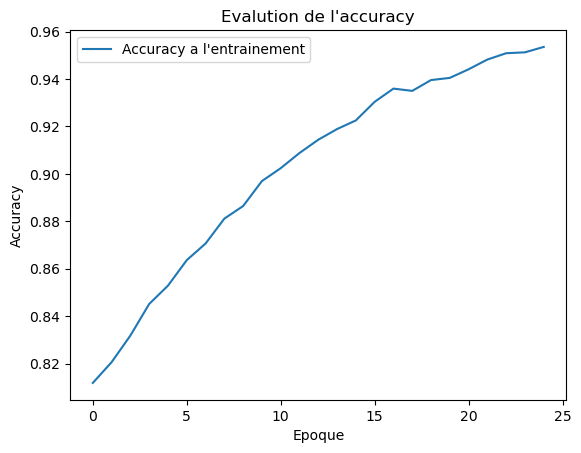

In [59]:
plt.plot(history.history['accuracy'], label='Accuracy a l\'entrainement')
plt.title("Evalution de l'accuracy")
plt.xlabel("Epoque")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
X_test.shape

(10000, 32, 32, 3)

* Testons sur de nouvelle données

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


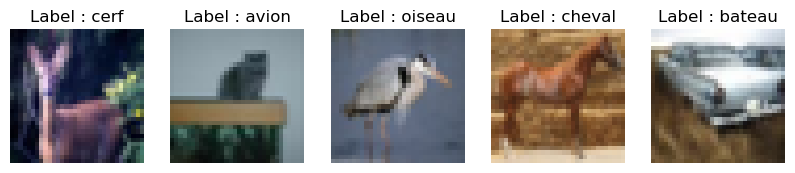

In [61]:
# Prediction sur exemple aleatoire
plt.figure(figsize=(10, 5))

for i in range(5):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx]
    true_label = np.argmax(y_test[idx])
    image = np.expand_dims(image, axis=0)
    predicted_label = np.argmax(model.predict(image))
    plt.subplot(1,5,i+1)
    plt.imshow(image[0,:,:,:], cmap='gray')
    plt.title(f"Label : {class_name[predicted_label]}")
    plt.axis('off')
plt.show()

* Testons sur une image

In [75]:
# chargons l'image
import cv2
img = cv2.imread('automobile.jpg')
print("Les dimensions de l'image actuelle sont : ", img.shape)

Les dimensions de l'image actuelle sont :  (1200, 673, 3)


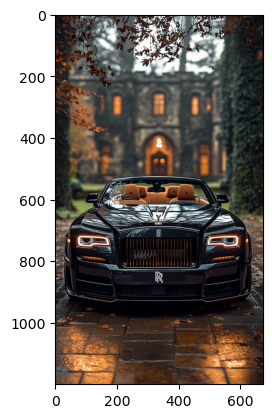

In [76]:
# Affichons l'image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Les dimensions sont maintenant de :  (32, 32, 3)


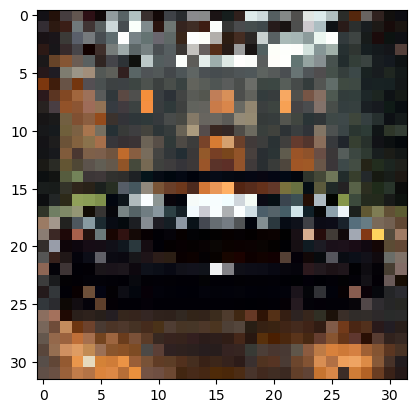

In [77]:
# Redimensionnons
img_resized = cv2.resize(img, (32, 32))
print("Les dimensions sont maintenant de : ", img_resized.shape)

# Affichons l'image redimensionnée
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.imshow(img_resized_rgb)
plt.show()

In [78]:
# Normalison l'image
img_a = img_resized.astype('float32')/255.
img_a = np.expand_dims(img_a, axis=0)

In [79]:
# Predisons l'image
pred = model.predict(img_a)
predicted_label = np.argmax(pred)
print(f"L'image est un(e) : {class_name[predicted_label]}, avec une proba de {pred[0, predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
L'image est un(e) : automobile, avec une proba de 0.9999526739120483


* Sauvegardons et chargeons le modele final

In [80]:
model.save('cifar10_cnn_model.h5')
print("Modèle sauvegardé sous le nom 'cifar10_cnn_model.h5'")

Modèle sauvegardé sous le nom 'cifar10_cnn_model.h5'


In [81]:
#Charger le modèle sauvegardé
from tensorflow.keras.models import load_model
loaded_model = load_model('cifar10_cnn_model.h5')
print("Modèle chargé avec succès.")

Modèle chargé avec succès.
